In [1]:
%install_ext https://raw.github.com/cjdrake/ipython-magic/master/gvmagic.py

In [2]:
%load_ext gvmagic

Installed gvmagic.py. To use it, type:
  %load_ext gvmagic


In [3]:
import pyeda
from pyeda.inter import *

In [4]:
a, b, c, d = map(bddvar, "abcd")

A binary decision diagram is a directed acyclic graph used to represent a Boolean function.
They were originally introduced by Lee, and later by Akers.
In 1986, Randal Bryant introduced the reduced, ordered BDD (ROBDD).

Let's take a look at some basic BDDs.

In [5]:
# Zero and One
%dotobjs pyeda.boolalg.bdd.BDDZERO, pyeda.boolalg.bdd.BDDONE

In [6]:
# Complement and Variable
%dotobjs ~a, a

A BDD is a full tree of Shannon cofactor expansions of the inputs variables from top (first variable) to bottom (last variable).

This is what it would look like if you do not merge isomorphic sub-trees.

In [7]:
%%dot graph {
    a   [label=a,shape=circle]
    b0  [label=b,shape=circle]
    b1  [label=b,shape=circle]
    c00 [label=c,shape=circle]
    c01 [label=c,shape=circle]
    c10 [label=c,shape=circle]
    c11 [label=c,shape=circle]

    zero000 [label=0,shape=box]
    one001  [label=1,shape=box]
    one010  [label=1,shape=box]
    one011  [label=1,shape=box]
    one100  [label=1,shape=box]
    one101  [label=1,shape=box]
    one110  [label=1,shape=box]
    one111  [label=1,shape=box]

    a -- b0 [label=0]
    a -- b1 [label=1]

    b0 -- c00 [label=0]
    b0 -- c01 [label=1]
    b1 -- c10 [label=0]
    b1 -- c11 [label=1]

    c00 -- zero000 [label=0]
    c00 -- one001  [label=1]
    c01 -- one010  [label=0]
    c01 -- one011  [label=1]
    c10 -- one100  [label=0]
    c10 -- one101  [label=1]
    c11 -- one110  [label=0]
    c11 -- one111  [label=1]
}

'graph BDD { n49011752 [label=0,shape=box]; n49151656 [label=1,shape=box]; n48711080 [label="c",shape=circle]; n47992776 [label="b",shape=circle]; n49948280 [label="b",shape=circle]; n48664712 [label="a",shape=circle]; n48711080 -- n49011752 [label=0,style=dashed]; n48711080 -- n49151656 [label=1]; n47992776 -- n49011752 [label=0,style=dashed]; n47992776 -- n48711080 [label=1]; n49948280 -- n48711080 [label=0,style=dashed]; n49948280 -- n49151656 [label=1]; n48664712 -- n47992776 [label=0,style=dashed]; n48664712 -- n49948280 [label=1]; }'

Join isomorphic `1` nodes:

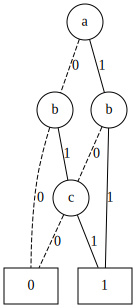

In [8]:
%%dot graph {
    a   [label=a,shape=circle]
    b0  [label=b,shape=circle]
    b1  [label=b,shape=circle]
    c00 [label=c,shape=circle]
    c01 [label=c,shape=circle]
    c10 [label=c,shape=circle]
    c11 [label=c,shape=circle]

    zero [label=0,shape=box]
    one  [label=1,shape=box]

    a -- b0 [label=0,style=dashed]
    a -- b1 [label=1]

    b0 -- c00 [label=0,style=dashed]
    b0 -- c01 [label=1]
    b1 -- c10 [label=0,style=dashed]
    b1 -- c11 [label=1]

    c00 -- zero [label=0,style=dashed]
    c00 -- one  [label=1]
    c01 -- one  [label=0,style=dashed]
    c01 -- one  [label=1]
    c10 -- one  [label=0,style=dashed]
    c10 -- one  [label=1]
    c11 -- one  [label=0,style=dashed]
    c11 -- one  [label=1]
}

Join isomorphic `c` nodes:

In [9]:
%%dot graph {
    a   [label=a,shape=circle]
    b0  [label=b,shape=circle]
    b1  [label=b,shape=circle]
    c00 [label=c,shape=circle]

    zero [label=0,shape=box]
    one  [label=1,shape=box]

    a -- b0 [label=0,style=dashed]
    a -- b1 [label=1]

    b0 -- c00 [label=0,style=dashed]
    b0 -- one [label=1]
    b1 -- one [label=0,style=dashed]
    b1 -- one  [label=1]

    c00 -- zero [label=0,style=dashed]
    c00 -- one  [label=1]
}

1

Join isomorphic `b` nodes:

In [10]:
%%dot graph {
    a   [label=a,shape=circle]
    b0  [label=b,shape=circle]
    c00 [label=c,shape=circle]

    zero [label=0,shape=box]
    one  [label=1,shape=box]

    a -- b0 [label=0,style=dashed]
    a -- one [label=1]

    b0 -- c00 [label=0,style=dashed]
    b0 -- one [label=1]

    c00 -- zero [label=0,style=dashed]
    c00 -- one  [label=1]
}

0

Some examples:

In [11]:
%dotobj a | b | c

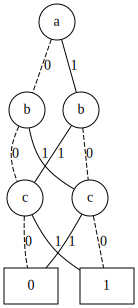

In [12]:
%dotobj a & b & c

In [13]:
%dotobj a ^ b ^ c

{a: 0, b: 0, c: 1}

In [14]:
# Equal-3
%dotobj ~a & ~b & ~c | a & b & c

[{a: 0, b: 0, c: 1},
 {a: 0, b: 1, c: 0},
 {a: 1, b: 0, c: 0},
 {a: 1, b: 1, c: 1}]

In [15]:
# Majority-3
%dotobj a & b | a & c | b & c

In [16]:
# OneHot-3
%dotobj (~a | ~b) & (~a | ~c) & (~b | ~c) & (a | b | c)

BDDs are a *canonical* form.
Given an identical ordering of input variables,
equivalent functions will always produce identical BDDs.

This makes testing for SAT and UNSAT trivial.
A function is SAT if its BDD is not $0$,
and it is UNSAT if its BDD is not $1$.

In [17]:
# A full minterm cover is unity.
~a & ~b | ~a & b | a & ~b | a & b

In [18]:
# a full maxterm cover is empty
(~a | ~b) & (~a | b) & (a | ~b) & (a | b)

Formal equivalence checking is also trivial.
You can test whether two BDDs are equivalent by using the `equivalent` method,
or the Python `is` operator.

In [ ]:
F1 = a ^ b ^ c
F2 = ~a & ~b & c | ~a & b & ~c | a & ~b & ~c | a & b & c

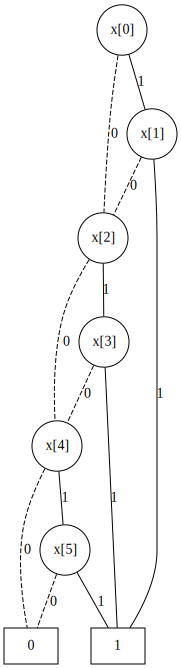

In [19]:
F1.equivalent(F2)

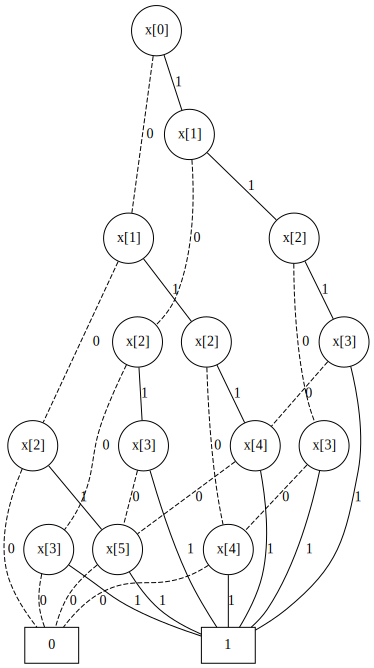

In [20]:
F1 is F2

The downside of BDDs is memory usage.

The size of some functions is heavily dependent on the ordering of the input variables,
but determining an optimal ordering is known to be a hard problem.

Certain functions,
no matter how cleverly you order their input variables,
will result in an exponentially-sized graph.
One example is multiplication.

In [21]:
X = bddvars('x', 6)

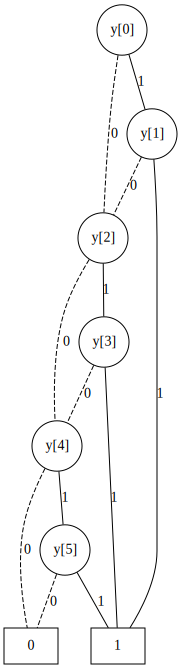

In [22]:
%dotobj X[0] & X[1] | X[2] & X[3] | X[4] & X[5]

In [ ]:
%dotobj X[0] & X[3] | X[1] & X[4] | X[2] & X[5]